# POS Tagging and NER

## Practical part
Load the text "The Time Machine" by H.G. Wells from your txt-file into a string variable.

In [78]:
file = open('../Vorlesung1/35-0.txt', 'r')
text = file.read()

## POS Tagging
- Use SpaCy to generate POS tags for The Time Machine.
- Extract for each word its original form, its lemma, UPOS and detail POS token.
- Group the words by the binary flag is_alpha. What can you use it for?
- Search the concept of stop words. Remove stop words from the text.
- Create a word cloud of nouns and another ones for verbs.

References
- https://universaldependencies.org/u/pos/

- English model `en_core_web_sm` not installed:
- `import sys` and `!{sys.executable} -m spacy download en_core_web_sm`

In [79]:
import spacy
nlp = spacy.load("en_core_web_sm")
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
about_doc = nlp(text)

#remove stopwords
text_noStopWord=[]
for token in about_doc:
    if token is not token.is_stop:
        text_noStopWord.append(token.text)

In [80]:
#lemmatize
lemmatize_doc = nlp(" ".join(text_noStopWord))
lemmatized = []
for token in lemmatize_doc:
    lemmatized.append(token.lemma_)

In [81]:
#POS tagging
about_doc = nlp(" ".join(text_noStopWord))
pos = []
for token in about_doc:
    pos.append(token.pos_)

In [82]:
len(pos)

44856

In [83]:
len(lemmatized)

44856

In [84]:
pos_lemmatized = []
for i in range(len(lemmatized)):
    pos_lemmatized.append([pos[i], lemmatized[i]])

In [85]:
pos_lemmatized

[['NOUN', '\ufeffthe'],
 ['PROPN', 'Project'],
 ['PROPN', 'Gutenberg'],
 ['PROPN', 'eBook'],
 ['ADP', 'of'],
 ['DET', 'the'],
 ['PROPN', 'Time'],
 ['PROPN', 'Machine'],
 ['PUNCT', ','],
 ['ADP', 'by'],
 ['PROPN', 'H.'],
 ['PROPN', 'G.'],
 ['PROPN', 'Wells'],
 ['SPACE', '\n\n '],
 ['DET', 'this'],
 ['PROPN', 'eBook'],
 ['AUX', 'be'],
 ['ADP', 'for'],
 ['DET', 'the'],
 ['NOUN', 'use'],
 ['ADP', 'of'],
 ['PRON', 'anyone'],
 ['ADV', 'anywhere'],
 ['ADP', 'in'],
 ['DET', 'the'],
 ['PROPN', 'United'],
 ['PROPN', 'States'],
 ['CCONJ', 'and'],
 ['SPACE', '\n '],
 ['ADJ', 'most'],
 ['ADJ', 'other'],
 ['NOUN', 'part'],
 ['ADP', 'of'],
 ['DET', 'the'],
 ['NOUN', 'world'],
 ['ADP', 'at'],
 ['DET', 'no'],
 ['NOUN', 'cost'],
 ['CCONJ', 'and'],
 ['ADP', 'with'],
 ['ADV', 'almost'],
 ['PRON', 'no'],
 ['NOUN', 'restriction'],
 ['SPACE', '\n '],
 ['ADV', 'whatsoever'],
 ['PUNCT', '.'],
 ['PRON', 'you'],
 ['AUX', 'may'],
 ['VERB', 'copy'],
 ['PRON', 'it'],
 ['PUNCT', ','],
 ['VERB', 'give'],
 ['PRON', 'i

#### Wordcloud

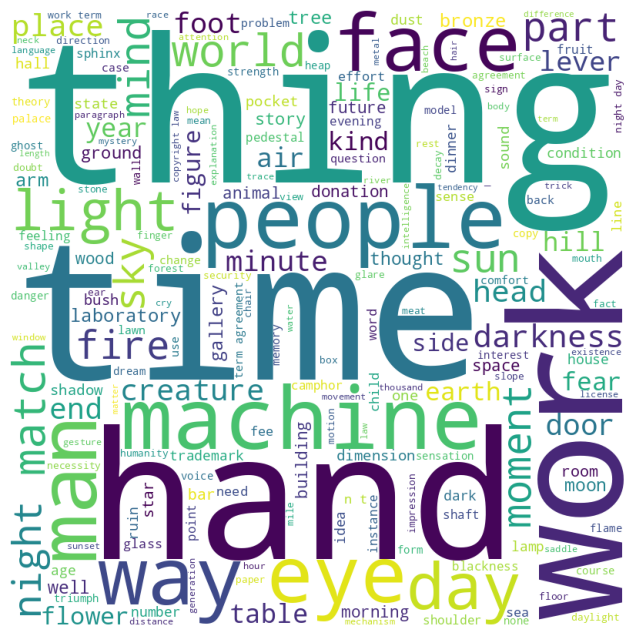

In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

noun_word_list = []
for i in range(len(pos_lemmatized)):
    if pos_lemmatized[i][0] == 'NOUN':
        noun_word_list.append(pos_lemmatized[i][1])

wordcloud_words = ""
wordcloud_words += " ".join(noun_word_list)+ " "        
wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', stopwords = STOPWORDS, min_font_size = 10).generate(wordcloud_words)

plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

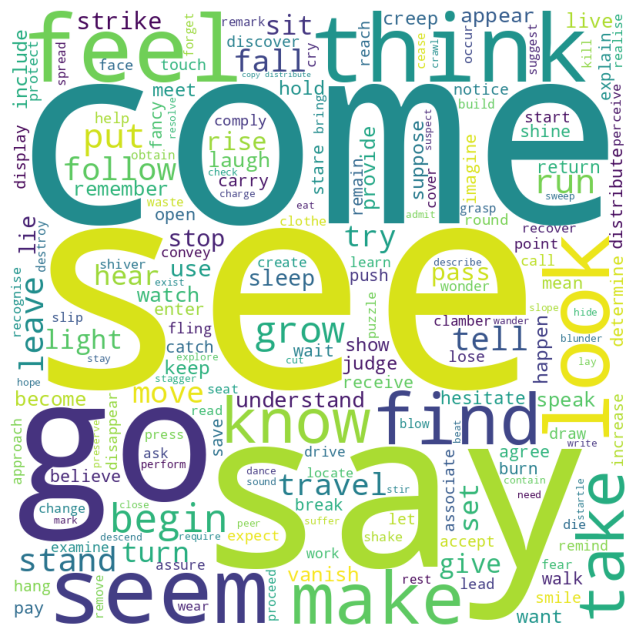

In [87]:
verb_word_list = []
for i in range(len(pos_lemmatized)):
    if pos_lemmatized[i][0] == 'VERB':
        verb_word_list.append(pos_lemmatized[i][1])

wordcloud_words = ""
wordcloud_words += " ".join(verb_word_list)+ " "        
wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', stopwords = STOPWORDS, min_font_size = 10).generate(wordcloud_words)

plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## Named Entity Recognition 
- Find named entities in The Time Machine.
- Group them by tags
- Visualize the named entities.

In [88]:
named_Entity_doc = nlp(text)
named_Entities = []
for ent in named_Entity_doc.ents:
    named_Entities.append([ent.text, ent.label_])

In [89]:
named_Entities

[['Project Gutenberg eBook', 'PERSON'],
 ['The Time Machine', 'ORG'],
 ['H. G. Wells', 'PERSON'],
 ['eBook', 'PRODUCT'],
 ['the United States', 'GPE'],
 ['the Project Gutenberg License', 'ORG'],
 ['eBook', 'ORG'],
 ['the United States', 'GPE'],
 ['eBook', 'PRODUCT'],
 ['Title: The Time Machine\n\nAuthor', 'WORK_OF_ART'],
 ['H. G. Wells', 'PERSON'],
 ['July, 1992', 'DATE'],
 ['eBook #35', 'LAW'],
 ['October 22', 'DATE'],
 ['2020', 'CARDINAL'],
 ['English', 'LANGUAGE'],
 ['The Time Machine\n\nAn Invention', 'ORG'],
 ['H. G. Wells', 'PERSON'],
 ['the Golden Age\n VI The Sunset of Mankind\n VII', 'FAC'],
 ['the Darkness\n XIII', 'ORG'],
 ['The Time Traveller’s', 'ORG'],
 ['the Story\n Epilogue\n\n\n\n\n I.\n Introduction\n\n\nThe Time Traveller',
  'WORK_OF_ART'],
 ['one', 'CARDINAL'],
 ['two', 'CARDINAL'],
 ['Filby', 'ORG'],
 ['nil_', 'PERSON'],
 ['Psychologist', 'ORG'],
 ['Filby', 'ORG'],
 ['Filby', 'ORG'],
 ['Filby', 'ORG'],
 ['four', 'CARDINAL'],
 ['Length', 'PERSON'],
 ['Breadth', 'PE

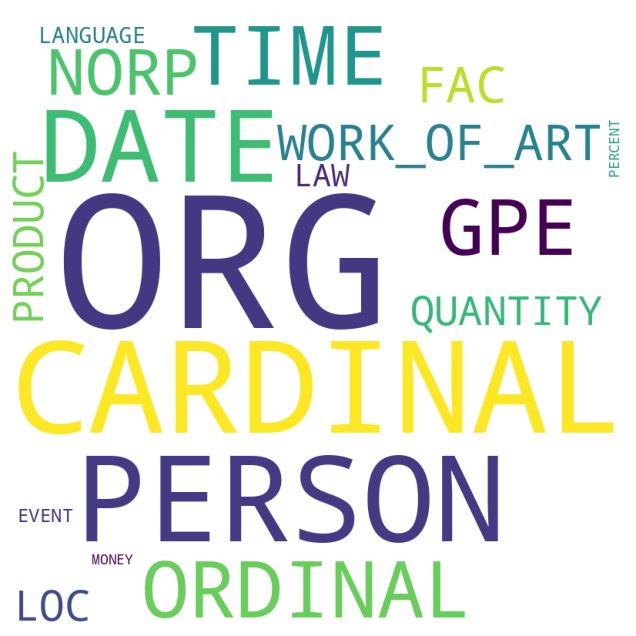

In [90]:
entity_word_list = []
for i in range(len(named_Entities)):
    entity_word_list.append(named_Entities[i][1])

wordcloud_words = ""
wordcloud_words += " ".join(entity_word_list)+ " "        
wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', stopwords = STOPWORDS, min_font_size = 10).generate(wordcloud_words)

plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

#### Challenge the NER tagger 
- Write a short text (few sentences) and try to create wrong tags by combining existing named entities or invent new ones. 
- Examples: "Republic of Bananas", "Palo Alto" "Palo Alto Networks" "Palo Alto Network Solutions" (here you could also try what happens in case you use improper spelling like "Palo Alto network solutions").
- Also use proper names and introduce a little type, e.g. "Nurmberg"
- Try lower case (germany, palo alto networks)

In [91]:
#TODO

In [92]:
#TODO

## Bag of Words, Tf-idf
We will use a textbook example´, the 20 Newsgroups Dataset 
- Load the dataset from scikit-learn (we will use just the training dataset)
- How many documents do you encounter? What is the content of a single document?
- Determine the bag-of-words matrix for the dataset.

Look at 20 documents you select randomly:
- What are the ten words with the highest counts?
- Repeat with Tf-idf instead of bag-of-words.

The machine learning package scikit-learn provides very well usable implementations for bag-of-words and Tf-idf.


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='train')['data']

len(data)

11314

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

CountVec = CountVectorizer(ngram_range=(1,1), stop_words='english')
Count_data = CountVec.fit_transform([data[69]])
df = pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names_out())
print(df.max())

29                                1
324                               1
3522                              2
415                               3
617                               2
75                                2
9553                              1
__                                1
____                              1
_____                             3
________                          1
_________                         1
_________________                 1
____________________________      1
______________________________    1
__n_n_                            1
asking                            1
ba                                1
balasubramanian                   2
box                               1
boxsprng                          1
com                               4
come                              1
condition                         1
contact                           1
corp                              1
corporation                       1
dd                          

In [95]:
#TODO

In [96]:
#TODO

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TODO